In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

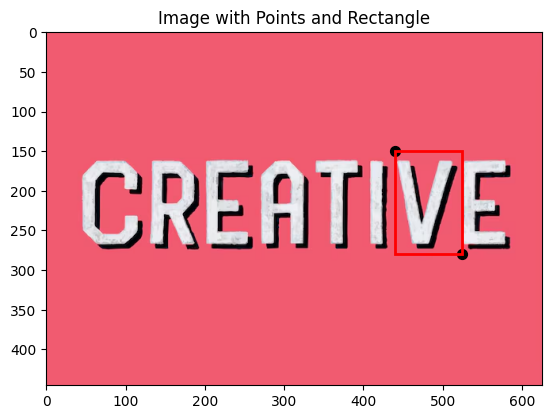

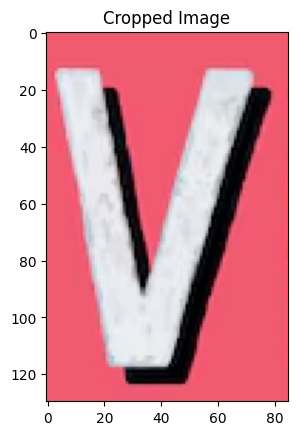

In [32]:
image_id = 1
crop_id = 7
crop_image_name = f'c{crop_id}'

# 定义两个坐标点
point1 = (440, 150)  # 第一个坐标点
point2 = (525, 280)  # 第二个坐标点

# 读取图片
img = cv2.imread(f"../image_repos/original_images/{image_id}/image.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 转换为RGB格式，以便Matplotlib显示

# 计算矩形的左上角坐标、宽度和高度
top_left_x = min(point1[0], point2[0])
top_left_y = min(point1[1], point2[1])
width = abs(point2[0] - point1[0])
height = abs(point2[1] - point1[1])

# 使用Matplotlib显示图片
fig, ax = plt.subplots()
ax.imshow(img_rgb)

# 标注两个坐标点，使用黑色圆点
ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], c='black', s=50)

# 画矩形框
rect = patches.Rectangle((top_left_x, top_left_y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.title('Image with Points and Rectangle')
plt.show()

# 裁剪矩形区域
cropped_img = img[top_left_y:top_left_y+height, top_left_x:top_left_x+width]

# 保存裁剪后的图像
cv2.imwrite(f'../image_repos/original_images/{image_id}/{crop_image_name}.png', cropped_img)

# 显示裁剪后的图像
plt.figure()
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

with open(f'../image_repos/original_images/{image_id}/c{crop_id}.txt', 'w') as writer:
    writer.write(f'{point1[0]}, {point1[1]} | {point2[0]}, {point2[1]} ')
